# DNN (dense neural network)

In [1]:
import sys

sys.path.append("../..")

In [14]:
import gzip
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import mlalgo.deep_learing.layers as nn
from mlalgo.deep_learing.neural_network import NeuralNetwork

In [3]:
sns.set_style('whitegrid')
set_matplotlib_formats('svg')

## Quick check &mdash; fitting model to a quadratic function

In [4]:
np.random.seed(30_08_2000)
X = np.linspace(-3, 3, 200)
y = X**2 + 1 + np.random.randn(200) * 0.5

In [5]:
random_indices = np.random.choice(len(X), 150, replace=False)
train_X = X[random_indices]
train_y = y[random_indices]

test_X = np.delete(X, random_indices)
test_y = np.delete(y, random_indices)

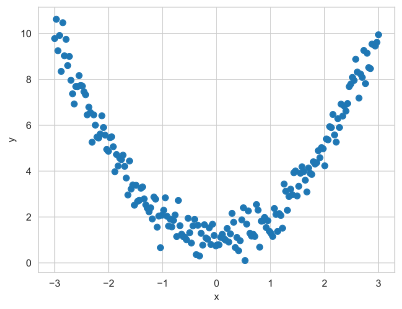

In [6]:
plt.plot(X, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
X_train = train_X.reshape(-1, 1, 1)
y_train = train_y.reshape(-1, 1, 1)

X_test = test_X.reshape(-1, 1, 1)

In [8]:
nn = NeuralNetwork(
    loss_function=nn.MSE(),
    layers=[nn.Layer(1, 10, nn.Sigmoid), nn.Layer(10, 1, nn.Linear)],
    optimizer=nn.GradientDesent(learning_rate=0.01)
)

In [9]:
nn.fit(X_train, y_train, epochs=300)

Epoch 0: 4.994129454300134
Epoch 1: 3.973557246499964
Epoch 2: 3.858269995820711
Epoch 3: 3.7485572016509083
Epoch 4: 3.6125774255618777
Epoch 5: 3.434357328344225
Epoch 6: 3.2050100596302196
Epoch 7: 2.9266756527175524
Epoch 8: 2.612382289252159
Epoch 9: 2.282021988426513
Epoch 10: 1.9570350414316426
Epoch 11: 1.6554263976585792
Epoch 12: 1.3887303726188138
Epoch 13: 1.1616412421372766
Epoch 14: 0.973537088020167
Epoch 15: 0.8205988298948855
Epoch 16: 0.69763195825452
Epoch 17: 0.5992788854537523
Epoch 18: 0.5206687541785164
Epoch 19: 0.4576754704635252
Epoch 20: 0.4069494597103375
Epoch 21: 0.3658409079833774
Epoch 22: 0.33228481068134924
Epoch 23: 0.30468415453544245
Epoch 24: 0.28180694305989173
Epoch 25: 0.262701723834273
Epoch 26: 0.24663106011731448
Epoch 27: 0.23302036718588431
Epoch 28: 0.22141909110769295
Epoch 29: 0.21147144998228135
Epoch 30: 0.20289443008076521
Epoch 31: 0.19546122220410644
Epoch 32: 0.18898871447613133
Epoch 33: 0.1833280049279217
Epoch 34: 0.178357164780

In [10]:
preds = nn.predict(X_test).reshape(-1)

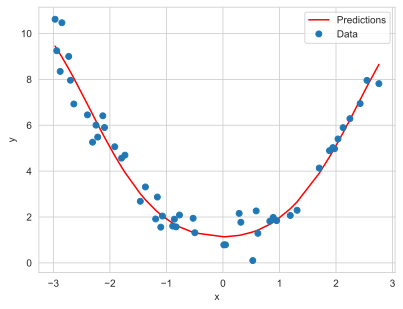

In [11]:
plt.plot(test_X, preds, c='r', label='Predictions')
plt.plot(test_X, test_y, 'o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

## MNIST dataset

In [12]:
def load_data():
    f = gzip.open(os.path.join("..", "data", "mnist.pkl.gz"), 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [15]:
train, validation, test = load_data_wrapper()

In [16]:
train = list(train)
test = list(test)

In [17]:
train_x = np.array([train[i][0] for i in range(len(train))])
train_y = np.array([train[i][1] for i in range(len(train))])

In [67]:
nn = NeuralNetwork(
    loss_function=nn.CrossEntropy(),
    layers=[
        nn.Layer(784, 90, nn.ReLU),
        nn.Layer(90, 40, nn.ReLU),
        nn.Layer(40, 10, nn.Softmax)
    ]
)

In [68]:
nn.fit(train_x, train_y, epochs=8)

Epoch 0: [[0.27900645]]
Epoch 1: [[0.1224977]]
Epoch 2: [[0.08771972]]
Epoch 3: [[0.06818003]]
Epoch 4: [[0.05983149]]
Epoch 5: [[0.05108022]]
Epoch 6: [[0.04572846]]
Epoch 7: [[0.04480794]]


In [69]:
def get_prediction(x):
    return np.argmax(nn.predict(x))

In [70]:
def get_the_accuracy():
    correct = 0
    for i in range(len(test)):
        correct += get_prediction(test[i][0]) == test[i][1]
    return correct / len(test)

In [71]:
get_the_accuracy()

0.9653